<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/RL/6-1-Cart-Pole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 10.5 MB/s eta 0:00:00


Initial state: [ 0.03647037 -0.0892358  -0.05592803 -0.06312564]
Step: 0, Action: 0, State: [ 0.03468566 -0.28351313 -0.05719054  0.21140045], Reward: 1.0
Step: 1, Action: 0, State: [ 0.02901539 -0.4777727  -0.05296253  0.4855086 ], Reward: 1.0
Step: 2, Action: 0, State: [ 0.01945994 -0.6721088  -0.04325236  0.76104033], Reward: 1.0
Step: 3, Action: 0, State: [ 0.00601776 -0.8666091  -0.02803155  1.0398057 ], Reward: 1.0
Step: 4, Action: 0, State: [-0.01131442 -1.0613476  -0.00723544  1.3235584 ], Reward: 1.0
Step: 5, Action: 1, State: [-0.03254137 -0.866135    0.01923573  1.02862   ], Reward: 1.0
Step: 6, Action: 1, State: [-0.04986407 -0.6712743   0.03980813  0.74203795], Reward: 1.0
Step: 7, Action: 0, State: [-0.06328956 -0.8669225   0.05464889  1.0469782 ], Reward: 1.0
Step: 8, Action: 0, State: [-0.08062801 -1.0627254   0.07558846  1.356303  ], Reward: 1.0
Step: 9, Action: 0, State: [-0.10188252 -1.25871     0.10271452  1.6716423 ], Reward: 1.0
Step: 10, Action: 1, State: [-0.127

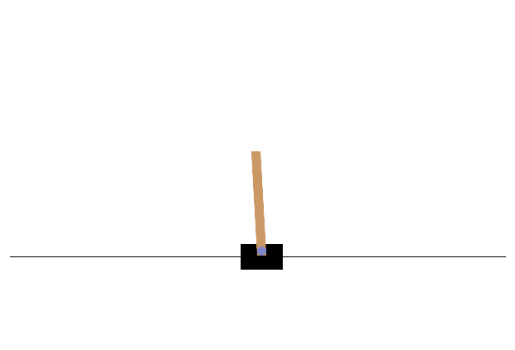

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Reset the environment with a custom seed and custom initial position range
obs, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})

# Extract the initial observation (state)
state = obs
print(f"Initial state: {state}")

# Run the environment for a few steps to see how it evolves
n_steps = 100  # Number of steps to simulate
frames = []  # To store frames for rendering

for step in range(n_steps):
    frames.append(env.render())  # Capture the frame of the environment

    action = env.action_space.sample()  # Randomly select an action (left or right)
    state, reward, done, truncated, info = env.step(action)  # Take a step

    # Print the state, action, and reward for each step
    print(f"Step: {step}, Action: {action}, State: {state}, Reward: {reward}")

    if done:
        print("Pole fell! Resetting environment.")
        obs, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})
        state = obs

# Render the environment frames to visualize the CartPole problem
env.close()

# Visualize a sample frame
plt.imshow(frames[0])
plt.axis('off')
plt.show()


Explanation:
Environment Creation: The code initializes the CartPole-v1 environment.
Reset with Custom Options: The environment is reset with a custom seed and initial position bounds for the state.
Simulation Loop: The environment is run for 100 steps, with actions randomly chosen using env.action_space.sample().
Frame Capture: Each frame is captured for rendering purposes.
Rendering and Plotting: At the end, a sample frame is displayed using matplotlib.
This code allows you to visualize the behavior of the CartPole over time.

In [ ]:
import gymnasium as gym
import numpy as np
import imageio
import os

# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Reset the environment with a custom seed and custom initial position range
obs, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})

# Extract the initial observation (state)
state = obs
print(f"Initial state: {state}")

# Run the environment for a few steps to see how it evolves
n_steps = 100  # Number of steps to simulate
frames = []  # To store frames for rendering

# Directory to save the video
video_dir = "cartpole_video"
if not os.path.exists(video_dir):
    os.makedirs(video_dir)

# Loop to simulate the environment and collect frames
for step in range(n_steps):
    frames.append(env.render())  # Capture the frame of the environment

    action = env.action_space.sample()  # Randomly select an action (left or right)
    state, reward, done, truncated, info = env.step(action)  # Take a step

    # Print the state, action, and reward for each step
    print(f"Step: {step}, Action: {action}, State: {state}, Reward: {reward}")

    if done:
        print("Pole fell! Resetting environment.")
        obs, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})
        state = obs

# Save frames as a video using imageio
video_file_path = os.path.join(video_dir, "cartpole_simulation.mp4")
imageio.mimsave(video_file_path, frames, fps=30)

# Close the environment
env.close()

print(f"Video saved to {video_file_path}")
